  ## 1. 데이터 전처리

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
# import koreanize_matplotlib # 한글설정 라이브러리 
import plotly.express as px

%matplotlib inline 

# mac 사용자
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')

In [2]:
train = pd.read_csv('./cell2celltrain.csv')
test = pd.read_csv('./cell2cellholdout.csv')
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

#### 결측치 처리 

In [38]:
data1 = train.copy()
data1.isnull().sum().sort_values(ascending=False)

AgeHH2                       909
AgeHH1                       909
PercChangeMinutes            367
PercChangeRevenues           367
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
ServiceArea                   24
CurrentEquipmentDays           1
Handsets                       1
HandsetModels                  1
OwnsComputer                   0
NonUSTravel                    0
BuysViaMailOrder               0
OptOutMailings                 0
RespondsToMailOffers           0
RetentionCalls                 0
HasCreditCard                  0
IncomeGroup                    0
RetentionOffersAccepted        0
NewCellphoneUser               0
NotNewCellphoneUser            0
ReferralsMadeBySubscriber      0
RVOwner                        0
OwnsMotorcycle                 0
AdjustmentsToCreditRating      0
HandsetPrice                   0
MadeCallTo

In [39]:
data1.dropna(inplace=True)
data1.reset_index(drop=True, inplace=True)
data1.isnull().sum().sort_values(ascending=False)

CustomerID                   0
HasCreditCard                0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
RetentionCalls               0
Churn                        0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH1                       0
CurrentEquipmentDays         0
HandsetModels                0
Handsets                     0
MonthlyR

#### 라벨인코딩 
범주형 컬럼 중 CreditRating 제외 모든 컬럼 드랍 후 라벨인코딩

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
data1.drop(columns=['CustomerID', 'HandsetPrice'], inplace=True, axis=1) 
le = LabelEncoder()
object_cols = data1.select_dtypes(include=['object']).columns
data1[object_cols] = data1[object_cols].apply(le.fit_transform)
data1[object_cols].head()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,655,0,0,1,0,0,0,1,1,...,1,1,0,0,0,1,0,2,4,0
1,1,607,1,0,0,0,0,0,1,1,...,1,1,1,0,0,0,3,2,4,2
2,0,349,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,2,3,1,2
3,0,607,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,3,0,3,0
4,1,560,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,0,4,2


 Case3 전 데이터 전처리 저장 

In [42]:
data1.to_csv('data1.csv', index=False)

---

### Case3  (상민)

#### 전처리
- 결측치 제거
- 불필요 컬럼 삭제 (ServiceArea, CustomerID)
- Unknown 많은 컬럼 삭제
- Age 컬럼 조정
- 이상치 제거
- RobustScaler 적용

In [4]:
data2 = train.copy()
data2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


#### 결측치 제거

In [5]:
data2.dropna(inplace=True)
data2.reset_index(drop=True, inplace=True)
data2.isnull().sum().sort_values(ascending=False)

CustomerID                   0
HasCreditCard                0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
RetentionCalls               0
Churn                        0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH1                       0
CurrentEquipmentDays         0
HandsetModels                0
Handsets                     0
MonthlyR

#### Unknown 값이 50% 이상인 컬럼과  ServiceArea 제거 

In [6]:
drop_cols = ['MaritalStatus', 'HandsetPrice', 'Homeownership', 'ServiceArea' , 'CustomerID']
data2.drop(drop_cols, inplace=True, axis=1)
data2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,Yes,No,0,6,No,0,No,3-Good,Town,Crafts
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,Yes,No,0,6,No,0,No,4-Medium,Other,Other
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,No,Yes,0,9,No,1,No,1-Highest,Other,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,...,No,No,0,4,No,0,No,2-High,Other,Professional
49748,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,No,No,0,3,No,0,No,3-Good,Other,Other
49749,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,No,No,0,7,No,0,No,1-Highest,Other,Professional
49750,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,No,No,0,2,No,0,No,5-Low,Other,Professional


#### AgeHH1, AgeHH2의 0값은 소득 그룹과, 신용등급이 동일한 그룹의 중간값으로 대치해준다

In [7]:
cond1 = (data2[['AgeHH1']]!=0).values
cond2 = (data2[['AgeHH2']]!=0).values
data_not_zero =  data2[cond1&cond2]
grouped_median = data_not_zero.groupby(['IncomeGroup', 'CreditRating'])[['AgeHH1', 'AgeHH2']].agg('median')
grouped_median

AgeHH1  AgeHH2
IncomeGroup CreditRating                
0           1-Highest       43.0    44.0
            2-High          40.0    38.0
            3-Good          40.0    43.0
            4-Medium        44.0    40.0
            5-Low           40.0    34.0
...                          ...     ...
9           3-Good          50.0    48.0
            4-Medium        50.0    48.0
            5-Low           48.0    46.0
            6-VeryLow       47.0    45.0
            7-Lowest        48.0    46.0

[70 rows x 2 columns]

In [8]:
for index, row in data2.iterrows():
    if row['AgeHH1'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH1']
        data2.at[index, 'AgeHH1'] = median_value
    
    if row['AgeHH2'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH2']
        data2.at[index, 'AgeHH2'] = median_value

In [9]:
def draw_px_histogram(df, x):
    fig = px.histogram(df, x=x)
    fig.update_layout(
    width=1500,  
    height=500, 
    )
    fig.show()

In [10]:
draw_px_histogram(data2, 'AgeHH1')

#### 라벨인코딩

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
object_cols = data2.select_dtypes(include=['object']).columns
data2[object_cols] = data2[object_cols].apply(le.fit_transform)
data2[object_cols]

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,2,4
1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,3,2,4
2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,3,1
3,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,3,0,3
4,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,4
49748,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,2,0,3
49749,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,4
49750,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,4


#### 이상치 제거 

In [13]:
data2.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
count,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,...,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000
mean,0.286320,58.717374,525.021466,46.834961,0.891841,39.754040,1.226327,-11.656175,-1.175937,6.010556,...,0.193178,0.138185,0.051475,4.402677,0.013547,0.053686,0.032582,1.864528,1.145059,3.163792
std,0.452045,44.317244,528.510155,23.759492,2.224725,96.091606,9.848360,255.858193,39.392124,9.036653,...,0.394796,0.345098,0.266490,3.110498,0.115602,0.382677,0.177541,1.568627,1.175946,0.886815
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.700000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,0.000000,48.380000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
75%,1.000000,70.910000,722.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,1.000000,1.000000,16.000000,9.000000,1.000000,25.000000,1.000000,6.000000,3.000000,7.000000


In [14]:
from sklearn.ensemble import IsolationForest
import collections

# n_estimators : 노드 수 (50 - 100사이의 숫자면 적당하다.)
# max_samples : 샘플링 수
# contamination : 이상치 비율
# max_features : 사용하고자 하는 독립변수 수 (1이면 전부 사용)
# random_state : seed를 일정하게 유지시켜줌(if None, the random number generator is the RandomState instance used by np.random)
# n_jobs : CPU 병렬처리 유뮤(1이면 안하는 것으로 디버깅에 유리. -1을 넣으면 multilple CPU를 사용하게 되어 메모리 사용량이 급격히 늘어날 수 있다.)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

# fit 함수를 이용하여, 데이터셋을 학습시킨다.
clf_ss.fit(data2)

# predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf_ss.predict(data2)

# 이상치의 개수를 Count하는 과정
collections.Counter(y_pred_outliers)

# 원래의 DataFrame에 붙히기. out행의 값이 -1인 것을 제거하면 이상치가 제거된 DataFrame을 얻을 수 있다.
data2['out']=y_pred_outliers
outliers=data2.loc[data2['out']== -1]
outlier_index=list(outliers.index)

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



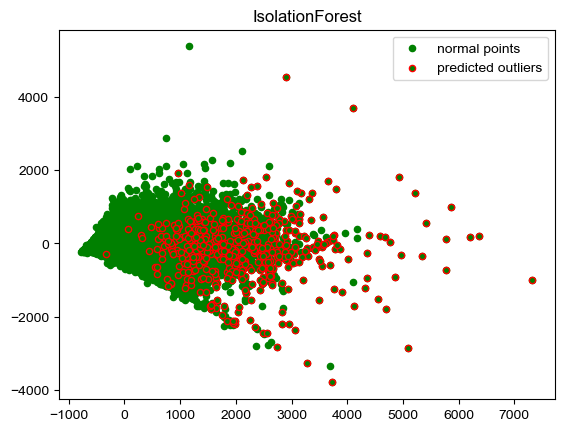

In [15]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(data2)
res=pd.DataFrame(pca.transform(data2))
Z = np.array(res)
plt.title("IsolationForest")
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [16]:
train_rm_out = data2[data2['out'] != -1]
train_rm_out['Churn'] = data2["Churn"]
train_rm_out.describe()

/var/folders/_t/v3rwz6m159lchhc0bwxy6_3c0000gn/T/ipykernel_44457/813980142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.0
mean,0.286596,57.091958,505.329313,46.329110,0.835752,36.169103,1.144555,-9.785662,-1.007165,5.740720,...,0.136740,0.050676,4.406871,0.013420,0.051509,0.030759,1.856357,1.147338,3.163946,1.0
std,0.452176,39.571917,483.445460,22.873273,1.846813,79.802557,8.844383,241.787375,36.268038,8.377834,...,0.343576,0.262797,3.111274,0.115067,0.374624,0.172666,1.563579,1.176139,0.885882,0.0
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,33.492500,157.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.700000,0.700000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.0
50%,0.000000,47.890000,361.500000,45.000000,0.250000,2.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.0
75%,1.000000,69.820000,704.000000,60.000000,0.740000,38.000000,0.200000,64.750000,1.600000,7.300000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,1.0
max,1.000000,1223.380000,4719.000000,400.000000,45.050000,2560.000000,1112.400000,5192.000000,2483.500000,221.700000,...,1.000000,16.000000,9.000000,1.000000,25.000000,1.000000,6.000000,3.000000,7.000000,1.0


#### RobustScaler

In [17]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def scale_data_with_robust_scaler(data):
    rs = RobustScaler()
    scaled_data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)
    return scaled_data

In [18]:
train_rs = scale_data_with_robust_scaler(train_rm_out)
train_rs.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
0,1.0,-0.657629,-0.260512,-0.766667,0.000000,-0.052632,0.0,-1.035775,-2.253012,-0.348485,...,0.0,0.0,-0.166667,0.0,0.0,1.0,-0.5,0.5,1.0,0.0
1,1.0,-0.850595,-0.642596,-0.933333,-0.337838,-0.052632,0.0,0.006814,0.036145,-0.409091,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.5,1.0,0.0
2,0.0,-0.272246,-0.646252,-0.233333,-0.337838,-0.052632,0.0,0.020443,0.036145,-0.454545,...,0.0,0.0,0.166667,0.0,0.0,0.0,0.5,1.0,-2.0,0.0
3,0.0,0.946666,1.737660,1.000000,1.337838,-0.052632,0.0,1.103918,1.012048,7.424242,...,0.0,0.0,0.166667,0.0,0.0,0.0,1.0,-0.5,0.0,0.0
4,1.0,-0.846466,-0.660878,-0.933333,-0.337838,-0.052632,0.0,0.034072,0.012048,-0.454545,...,1.0,0.0,0.666667,0.0,1.0,0.0,-0.5,-0.5,1.0,0.0


#### 오버샘플링

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
# Separate features (X) and target variable (y)
X = train_rs.drop('Churn', axis=1)
y = train_rs['Churn']

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=70)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced data
train_rs_ov = pd.concat([X_resampled, y_resampled], axis=1)

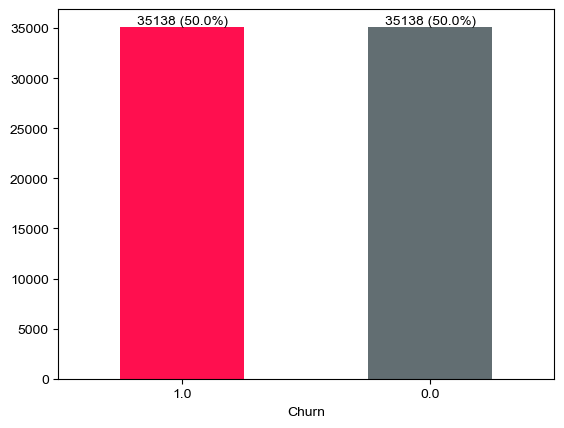

In [21]:
import matplotlib.pyplot as plt
value_counts = train_rs_ov['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['#ff0f4f','#626e72'])
# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()

#### Case3 모델 학습

In [23]:
from sklearn.model_selection import train_test_split

def split_train_test_data(data, target_variable, test_size=0.3, random_state=70):
    
    y = data[target_variable]
    X = data.drop(columns=[target_variable])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print('X train shape: ', X_train.shape)
    print('Y train shape: ', y_train.shape)
    print('X test shape: ', X_test.shape)
    print('Y test shape: ', y_test.shape)

    return X_train, X_test, y_train, y_test

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report

In [25]:
# 모델학습 후 5가지 정보 확인하는 코드
def report(y_test, pred):

    accuracy = accuracy_score(y_test, pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y_test, pred)
    print("Precision:", precision)

    recall = recall_score(y_test, pred)
    print("Recall:", recall)

    f1 = f1_score(y_test, pred)
    print("F1 Score:", f1)

    tn = ((y_test == 0) & (pred == 0)).sum()
    fp = ((y_test == 0) & (pred == 1)).sum()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

In [26]:
# validation 함수

def perform_cross_validation(X, y, models):
    results = []
    names = []

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

        print(name, cv_results.mean(), cv_results.std())

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('LogisticRegression', LogisticRegression())
]

In [27]:
# 모델별 정보 DataFrame에 담는 함수 for. RobustScaler 
def evaluate_models_rs(models, X_train, y_train, X_test, y_test, df):

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        print(name)
        print(classification_report(y_test, pred, target_names=['No', 'Yes']))

        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, pos_label=1.0)
        recall = recall_score(y_test, pred, pos_label=1.0)
        f1 = f1_score(y_test, pred, pos_label=1.0)

        model_results = pd.DataFrame({'Model': [name],
                                      'Accuracy': [accuracy],
                                      'Precision': [precision],
                                      'Recall': [recall],
                                      'F1-Score': [f1]})

        df = pd.concat([df, model_results], ignore_index=True)

    return df

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('LogisticRegression', LogisticRegression())
]

In [28]:
X_train, X_test, y_train, y_test = split_train_test_data(train_rs_ov, 'Churn')

X train shape:  (49193, 53)
Y train shape:  (49193,)
X test shape:  (21083, 53)
Y test shape:  (21083,)


In [78]:
perform_cross_validation(X_train, y_train, models)

RandomForestClassifier 0.8104717364782431 0.0024964664334229123
DecisionTreeClassifier 0.7029890199267996 0.005077100651441533
AdaBoostClassifier 0.7413379422529484 0.007306027871588429
GradientBoostingClassifier 0.7953639690931273 0.005337448439421077


/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/sangm

LogisticRegression 0.5877389182594551 0.003183990098586967


/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [79]:
train_rs_ov_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
train_rs_ov_df = evaluate_models_rs(models, X_train, y_train, X_test, y_test,train_rs_ov_df)
train_rs_ov_df

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.75      0.93      0.83     10487
         Yes       0.91      0.69      0.79     10591

    accuracy                           0.81     21078
   macro avg       0.83      0.81      0.81     21078
weighted avg       0.83      0.81      0.81     21078

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.72      0.71      0.72     10487
         Yes       0.72      0.73      0.72     10591

    accuracy                           0.72     21078
   macro avg       0.72      0.72      0.72     21078
weighted avg       0.72      0.72      0.72     21078

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.82      0.76     10487
         Yes       0.79      0.67      0.72     10591

    accuracy                           0.74     21078
   macro avg       0.75      0.74      0.74     21078
weighted 

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.812364,0.912789,0.692758,0.787697
1,DecisionTreeClassifier,0.718711,0.717039,0.727127,0.722048
2,AdaBoostClassifier,0.741864,0.787517,0.665943,0.721645
3,GradientBoostingClassifier,0.791014,0.919902,0.639788,0.754692
4,LogisticRegression,0.592324,0.589822,0.619394,0.604246


---

### Case4  (상민)
- Permutation Importance 를 통해 중요 feature 선택 후 모델학습

#### Permutation importance 학습

In [84]:
#!pip install eli5

In [87]:
# Permutation Importance 돌리려고
# rf_clf=RandomForestClassifier(파리미터) 에서
# 파라미터를 어떻게 설정할 줄 몰라서 모델 돌리는 함수에서 rf_clf 에 저장하도록 시켰는데 맞는지 모르겠어요ㅠ

def evaluate_models_rs(models, X_train, y_train, X_test, y_test, df):

    rf_clf = None  # RandomForestClassifier 객체를 저장할 변수

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        if name == 'RandomForestClassifier':
            rf_clf = model  # RandomForestClassifier 객체 저장

        print(name)
        print(classification_report(y_test, pred, target_names=['No', 'Yes']))

        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, pos_label=1.0)
        recall = recall_score(y_test, pred, pos_label=1.0)
        f1 = f1_score(y_test, pred, pos_label=1.0)

        model_results = pd.DataFrame({'Model': [name],
                                      'Accuracy': [accuracy],
                                      'Precision': [precision],
                                      'Recall': [recall],
                                      'F1-Score': [f1]})

        df = pd.concat([df, model_results], ignore_index=True)

    return df, rf_clf

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('LogisticRegression', LogisticRegression())
]

df, rf_clf = evaluate_models_rs(models, X_train, y_train, X_test, y_test, train_rs_ov_df)

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.75      0.93      0.83     10487
         Yes       0.91      0.69      0.78     10591

    accuracy                           0.81     21078
   macro avg       0.83      0.81      0.81     21078
weighted avg       0.83      0.81      0.81     21078

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.72      0.71      0.71     10487
         Yes       0.72      0.73      0.72     10591

    accuracy                           0.72     21078
   macro avg       0.72      0.72      0.72     21078
weighted avg       0.72      0.72      0.72     21078

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.82      0.76     10487
         Yes       0.79      0.67      0.72     10591

    accuracy                           0.74     21078
   macro avg       0.75      0.74      0.74     21078
weighted 

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [88]:
rf_clf

RandomForestClassifier()

In [90]:
# f1 스코어를 중점으로 랜덤포레스트에서 중요하게 작용한 상위 35feature들 확인
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf_clf,scoring = 'f1', random_state=70).fit(X_train, y_train)
eli5.show_weights(perm,top=35, feature_names=X_test.columns.tolist())

Weight,Feature
0.0208 ± 0.0003,MonthsInService
0.0156 ± 0.0005,CurrentEquipmentDays
0.0078 ± 0.0004,HandsetRefurbished
0.0074 ± 0.0004,CreditRating
0.0049 ± 0.0007,NewCellphoneUser
0.0034 ± 0.0003,HandsetModels
0.0034 ± 0.0003,PrizmCode
0.0034 ± 0.0003,MonthlyMinutes
0.0032 ± 0.0004,TotalRecurringCharge
0.0029 ± 0.0003,OverageMinutes


In [95]:
# 중요 특성 35가지 + Churn
perm_features_35 = ['MonthsInService', 'CurrentEquipmentDays', 'HandsetRefurbished', 'CreditRating', 'NewCellphoneUser',
                    'HandsetModels', 'PrizmCode', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes',
                    'PercChangeMinutes', 'UniqueSubs', 'HasCreditCard', 'IncomeGroup', 'Handsets',
                    'TruckOwner', 'DirectorAssistedCalls', 'PercChangeRevenues', 'NotNewCellphoneUser', 'AgeHH1',
                    'CustomerCareCalls', 'BlockedCalls', 'HandsetWebCapable', 'UnansweredCalls', 'MonthlyRevenue',
                    'OffPeakCallsInOut', 'AgeHH2', 'RoamingCalls', 'InboundCalls', 'DroppedCalls',
                    'PeakCallsInOut', 'ChildrenInHH', 'Occupation', 'OutboundCalls', 'ReceivedCalls', 'Churn']

In [97]:
train_rs_ov_pi = train_rs_ov[perm_features_35].copy()
train_rs_ov_pi

,MonthsInService,CurrentEquipmentDays,HandsetRefurbished,CreditRating,NewCellphoneUser,HandsetModels,PrizmCode,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,...,AgeHH2,RoamingCalls,InboundCalls,DroppedCalls,PeakCallsInOut,ChildrenInHH,Occupation,OutboundCalls,ReceivedCalls,Churn
0,3.461538,0.096154,0.000000,-0.500000,0.000000,1.000000,0.500000,-0.259598,-0.766667,-0.052632,...,0.000000,0.000000,-0.229885,-0.348485,-0.031480,0.000000,1.0,-0.447811,0.324555,1.0
1,3.230769,3.759615,0.000000,1.000000,1.000000,0.000000,0.500000,-0.641682,-0.933333,-0.052632,...,0.000000,0.000000,-0.229885,-0.409091,-0.587618,1.000000,1.0,-0.447811,-0.367260,1.0
2,3.384615,4.746795,0.000000,0.500000,1.000000,0.000000,1.000000,-0.645338,-0.233333,-0.052632,...,-2.000000,0.000000,-0.229885,-0.454545,-0.626443,1.000000,-2.0,-0.437710,-0.364413,0.0
3,3.307692,0.407051,0.000000,1.000000,1.000000,3.000000,-0.500000,1.738574,1.000000,-0.052632,...,0.000000,0.000000,16.666667,7.424242,5.190976,0.000000,0.0,12.020202,1.058363,0.0
4,2.846154,1.669872,0.000000,-0.500000,0.000000,2.000000,-0.500000,-0.659963,-0.933333,-0.052632,...,1.500000,0.000000,-0.229885,-0.454545,-0.640084,0.000000,1.0,-0.447811,-0.367260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70253,0.412577,-0.400040,0.474036,1.974036,0.000000,1.474036,-0.500000,-0.004682,-0.063205,0.473332,...,-0.657455,0.000000,-0.098596,-0.207299,0.132293,1.000000,1.0,-0.269428,0.149287,1.0
70254,0.294039,0.837075,0.000000,0.205628,0.000000,0.000000,-0.362915,0.642669,-0.597306,2.163818,...,-0.465729,0.000000,-0.025029,0.609974,0.524506,0.000000,0.0,-0.240636,3.204908,1.0
70255,0.242871,-0.423879,0.000000,1.500000,0.894665,0.894665,-0.394665,0.350590,-0.017556,-0.012456,...,-0.920999,0.000000,1.900121,0.087676,0.000742,0.105335,0.0,0.652660,0.789632,1.0
70256,0.309960,0.876975,0.000000,-0.500000,0.000000,0.000000,0.500000,-0.101929,-1.062199,1.072317,...,-0.585790,0.000000,-0.147360,-0.239702,-0.406873,0.447720,0.0,-0.298047,-0.219535,1.0


In [98]:
# 재학습
X_train, X_test, y_train, y_test = split_train_test_data(train_rs_ov_pi, 'Churn')

X train shape:  (49180, 35)
Y train shape:  (49180,)
X test shape:  (21078, 35)
Y test shape:  (21078,)


In [99]:
perform_cross_validation(X_train, y_train, models)

RandomForestClassifier 0.8090077267181781 0.0026941654453114115
DecisionTreeClassifier 0.7023180154534364 0.005201156668717105
AdaBoostClassifier 0.741276941846279 0.008890958952569675
GradientBoostingClassifier 0.79509963399756 0.0048334670036579335


/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/sangm

LogisticRegression 0.5812322082147215 0.003161838067088255


/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [102]:
train_rs_ov_pi_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
train_rs_ov_pi_df = evaluate_models_rs(models, X_train, y_train, X_test, y_test,train_rs_ov_pi_df)
train_rs_ov_pi_df

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.75      0.92      0.83     10487
         Yes       0.90      0.70      0.79     10591

    accuracy                           0.81     21078
   macro avg       0.83      0.81      0.81     21078
weighted avg       0.83      0.81      0.81     21078

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.71      0.70      0.71     10487
         Yes       0.71      0.72      0.72     10591

    accuracy                           0.71     21078
   macro avg       0.71      0.71      0.71     21078
weighted avg       0.71      0.71      0.71     21078

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.80      0.75     10487
         Yes       0.78      0.67      0.72     10591

    accuracy                           0.74     21078
   macro avg       0.74      0.74      0.74     21078
weighted 

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.809043,0.902526,0.695024,0.785299
1,DecisionTreeClassifier,0.711737,0.709474,0.721934,0.715650
2,AdaBoostClassifier,0.737167,0.775079,0.671891,0.719806
3,GradientBoostingClassifier,0.788832,0.919628,0.635256,0.751438
4,LogisticRegression,0.584638,0.581426,0.618922,0.599588


In [103]:
# 중요 특성 25가지 + Churn
perm_features_25 = ['MonthsInService', 'CurrentEquipmentDays', 'HandsetRefurbished', 'CreditRating', 'NewCellphoneUser',
                    'HandsetModels', 'PrizmCode', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes',
                    'PercChangeMinutes', 'UniqueSubs', 'HasCreditCard', 'IncomeGroup', 'Handsets',
                    'TruckOwner', 'DirectorAssistedCalls', 'PercChangeRevenues', 'NotNewCellphoneUser', 'AgeHH1',
                    'CustomerCareCalls', 'BlockedCalls', 'HandsetWebCapable', 'UnansweredCalls', 'MonthlyRevenue', 'Churn']

In [104]:
train_rs_ov_pi_25 = train_rs_ov[perm_features_25].copy()
train_rs_ov_pi_25

,MonthsInService,CurrentEquipmentDays,HandsetRefurbished,CreditRating,NewCellphoneUser,HandsetModels,PrizmCode,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,...,DirectorAssistedCalls,PercChangeRevenues,NotNewCellphoneUser,AgeHH1,CustomerCareCalls,BlockedCalls,HandsetWebCapable,UnansweredCalls,MonthlyRevenue,Churn
0,3.461538,0.096154,0.000000,-0.500000,0.000000,1.000000,0.500000,-0.259598,-0.766667,-0.052632,...,0.000000,-2.226190,0.000000,2.000000,0.000000,-0.081081,0.000000,-0.315961,-0.657446,1.0
1,3.230769,3.759615,0.000000,1.000000,1.000000,0.000000,0.500000,-0.641682,-0.933333,-0.052632,...,-0.337838,0.035714,0.000000,-0.200000,0.000000,-0.270270,-1.000000,-0.433225,-0.850399,1.0
2,3.384615,4.746795,0.000000,0.500000,1.000000,0.000000,1.000000,-0.645338,-0.233333,-0.052632,...,-0.337838,0.035714,0.000000,-1.600000,0.000000,-0.270270,-1.000000,-0.521173,-0.272089,0.0
3,3.307692,0.407051,0.000000,1.000000,1.000000,3.000000,-0.500000,1.738574,1.000000,-0.052632,...,1.337838,1.000000,0.000000,-1.200000,2.529412,1.810811,0.000000,1.954397,0.946738,0.0
4,2.846154,1.669872,0.000000,-0.500000,0.000000,2.000000,-0.500000,-0.659963,-0.933333,-0.052632,...,-0.337838,0.011905,1.000000,0.400000,0.000000,-0.270270,-1.000000,-0.521173,-0.846270,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70253,0.412577,-0.400040,0.474036,1.974036,0.000000,1.474036,-0.500000,-0.004682,-0.063205,0.473332,...,-0.337838,1.078290,0.000000,-0.220771,2.220021,0.223234,0.000000,0.042940,-0.166956,1.0
70254,0.294039,0.837075,0.000000,0.205628,0.000000,0.000000,-0.362915,0.642669,-0.597306,2.163818,...,-0.046313,-6.882876,0.000000,-0.391919,0.000000,-0.069966,-0.137085,0.173108,0.290425,1.0
70255,0.242871,-0.423879,0.000000,1.500000,0.894665,0.894665,-0.394665,0.350590,-0.017556,-0.012456,...,0.035586,-0.072699,0.000000,-1.852531,4.625332,1.386882,0.000000,0.170437,-0.344922,1.0
70256,0.309960,0.876975,0.000000,-0.500000,0.000000,0.000000,0.500000,-0.101929,-1.062199,1.072317,...,-0.337838,-1.264778,0.447720,-0.468632,0.324871,-0.165785,0.000000,-0.307682,-0.648085,1.0


In [105]:
# 재학습
X_train, X_test, y_train, y_test = split_train_test_data(train_rs_ov_pi_25, 'Churn')

X train shape:  (49180, 25)
Y train shape:  (49180,)
X test shape:  (21078, 25)
Y test shape:  (21078,)


In [ ]:
perform_cross_validation(X_train, y_train, models)

In [106]:
train_rs_ov_pi_25_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
train_rs_ov_pi_25_df = evaluate_models_rs(models, X_train, y_train, X_test, y_test,train_rs_ov_pi_25_df)
train_rs_ov_pi_25_df

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.74      0.92      0.82     10487
         Yes       0.90      0.69      0.78     10591

    accuracy                           0.80     21078
   macro avg       0.82      0.80      0.80     21078
weighted avg       0.82      0.80      0.80     21078

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.72      0.70      0.71     10487
         Yes       0.71      0.72      0.72     10591

    accuracy                           0.71     21078
   macro avg       0.71      0.71      0.71     21078
weighted avg       0.71      0.71      0.71     21078

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.82      0.76     10487
         Yes       0.79      0.67      0.72     10591

    accuracy                           0.74     21078
   macro avg       0.75      0.74      0.74     21078
weighted 

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.801452,0.895139,0.685110,0.776167
1,DecisionTreeClassifier,0.713445,0.710987,0.724011,0.717440
2,AdaBoostClassifier,0.743714,0.789468,0.668114,0.723739
3,GradientBoostingClassifier,0.787693,0.920055,0.632424,0.749594
4,LogisticRegression,0.584401,0.581197,0.618733,0.599378


- 특성 수를 줄이면 확실히 성능이 저하되므로 35개 특성 모두 사용하는게 좋은 것 같음

> case4 결과 : case3 성능이 더 높다.

---

## 성능 Test
- 랜덤포레스트 모델의 best parameters 로 설정한 최종 모델

#### test 데이터프레임 가공

In [30]:
rf_clf_best = RandomForestClassifier(random_state=70, max_depth=10, min_samples_leaf=5,
                                     min_samples_split=8, n_estimators=100)
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=8,
                       random_state=70)

In [43]:
test1 = test.copy()

In [46]:
test1.drop(columns='Churn', axis=1, inplace=True)
test1

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,...,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,...,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [48]:
test1.dropna(inplace=True)
test1.reset_index(drop=True, inplace=True)
test1.isnull().sum().sort_values(ascending=False)

CustomerID                   0
AgeHH1                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
HasCreditCard                0
RetentionCalls               0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH2                       0
CurrentEquipmentDays         0
MonthlyRevenue               0
HandsetModels                0
MonthlyMinutes               0
TotalRec

In [50]:
drop_cols = ['MaritalStatus', 'HandsetPrice', 'Homeownership', 'ServiceArea' , 'CustomerID']
test1.drop(drop_cols, inplace=True, axis=1)

In [51]:
cond1 = (test1[['AgeHH1']]!=0).values
cond2 = (test1[['AgeHH2']]!=0).values
data_not_zero =  test1[cond1&cond2]
grouped_median = data_not_zero.groupby(['IncomeGroup', 'CreditRating'])[['AgeHH1', 'AgeHH2']].agg('median')
grouped_median

AgeHH1  AgeHH2
IncomeGroup CreditRating                
0           1-Highest       40.0    42.0
            2-High          41.0    36.0
            3-Good          34.0    48.0
            4-Medium        44.0    25.0
            5-Low           35.0    35.0
...                          ...     ...
9           3-Good          50.0    48.0
            4-Medium        48.0    48.0
            5-Low           48.0    44.0
            6-VeryLow       46.0    46.0
            7-Lowest        50.0    49.0

[70 rows x 2 columns]

In [52]:
for index, row in test1.iterrows():
    if row['AgeHH1'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH1']
        test1.at[index, 'AgeHH1'] = median_value
    
    if row['AgeHH2'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH2']
        test1.at[index, 'AgeHH2'] = median_value

In [54]:
def draw_px_histogram(df, x):
    fig = px.histogram(df, x=x)
    fig.update_layout(
    width=1500,  
    height=500, 
    )
    fig.show()
    
draw_px_histogram(test1, 'AgeHH1')

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
object_cols = test1.select_dtypes(include=['object']).columns
test1[object_cols] = test1[object_cols].apply(le.fit_transform)
test1[object_cols]

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,4,0,3
1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,1
3,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,3
4,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19524,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,2,0,3
19525,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,2,4
19526,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,3,0,3
19527,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,2,0,4


In [56]:
from sklearn.ensemble import IsolationForest
import collections

# n_estimators : 노드 수 (50 - 100사이의 숫자면 적당하다.)
# max_samples : 샘플링 수
# contamination : 이상치 비율
# max_features : 사용하고자 하는 독립변수 수 (1이면 전부 사용)
# random_state : seed를 일정하게 유지시켜줌(if None, the random number generator is the RandomState instance used by np.random)
# n_jobs : CPU 병렬처리 유뮤(1이면 안하는 것으로 디버깅에 유리. -1을 넣으면 multilple CPU를 사용하게 되어 메모리 사용량이 급격히 늘어날 수 있다.)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

# fit 함수를 이용하여, 데이터셋을 학습시킨다.
clf_ss.fit(test1)

# predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf_ss.predict(test1)

# 이상치의 개수를 Count하는 과정
collections.Counter(y_pred_outliers)

# 원래의 DataFrame에 붙히기. out행의 값이 -1인 것을 제거하면 이상치가 제거된 DataFrame을 얻을 수 있다.
test1['out']=y_pred_outliers
outliers=test1.loc[test1['out']== -1]
outlier_index=list(outliers.index)

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



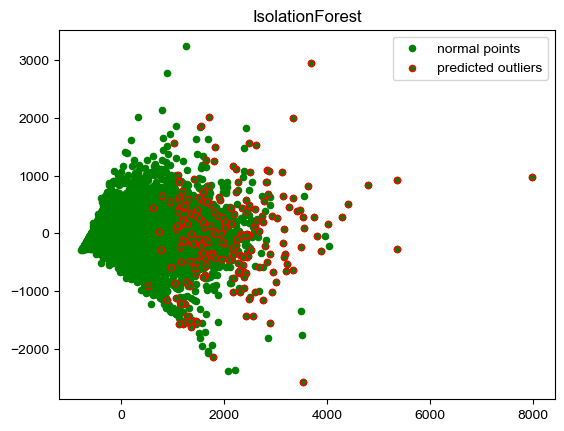

In [57]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(test1)
res=pd.DataFrame(pca.transform(test1))
Z = np.array(res)
plt.title("IsolationForest")
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [60]:
train_rm_out_test = test1[test1['out'] != -1]
train_rm_out_test.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
count,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,...,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.000000,19333.0
mean,57.191968,505.202141,46.459887,0.842340,36.411628,1.137609,-9.135002,-1.179786,5.721316,3.813971,...,0.141571,0.046915,4.439197,0.013914,0.048828,0.031552,1.863860,1.145865,3.174831,1.0
std,39.151906,484.754783,23.303903,1.954099,79.411178,6.546911,236.283389,34.480793,7.999767,9.078226,...,0.348619,0.237500,3.107294,0.117137,0.331615,0.174809,1.572276,1.174261,0.918100,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2482.000000,-453.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.580000,158.000000,30.000000,0.000000,0.000000,0.000000,-81.000000,-6.900000,0.700000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.0
50%,48.090000,360.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,3.000000,1.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.0
75%,69.480000,701.000000,60.000000,0.740000,39.000000,0.300000,65.000000,1.500000,7.300000,3.700000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,1.0
max,635.060000,4254.000000,350.000000,67.810000,1474.000000,488.800000,3222.000000,895.600000,124.000000,313.000000,...,1.000000,5.000000,9.000000,1.000000,11.000000,1.000000,6.000000,3.000000,7.000000,1.0


In [61]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def scale_data_with_robust_scaler(data):
    rs = RobustScaler()
    scaled_data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)
    return scaled_data

In [63]:
train_rs_test = scale_data_with_robust_scaler(train_rm_out_test)
train_rs_test

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
0,0.261838,0.226519,-0.266667,0.000000,0.538462,0.000000,3.671233,6.107143,0.803030,0.000000,...,1.0,0.0,0.000000,0.0,1.0,0.0,1.5,-0.5,0.0,0.0
1,0.198886,0.386740,0.900000,-0.337838,-0.051282,0.000000,0.287671,0.035714,1.015152,-0.081081,...,0.0,0.0,0.166667,0.0,2.0,0.0,-0.5,-0.5,1.0,0.0
2,1.371866,1.250460,0.166667,6.351351,10.717949,0.000000,1.383562,2.809524,1.469697,0.540541,...,0.0,0.0,-0.166667,0.0,3.0,0.0,0.5,0.5,-2.0,0.0
3,-0.348189,-0.381215,-0.500000,-0.337838,0.358974,0.000000,0.232877,0.904762,-0.151515,-0.081081,...,1.0,0.0,-0.166667,0.0,1.0,0.0,-0.5,-0.5,0.0,0.0
4,0.200000,1.570902,0.166667,0.662162,-0.051282,4.333333,1.184932,0.154762,-0.045455,1.351351,...,1.0,0.0,-0.333333,0.0,0.0,0.0,-0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19328,-0.503900,-0.071823,-0.500000,-0.337838,-0.051282,0.000000,0.027397,0.035714,-0.454545,-0.270270,...,0.0,0.0,-0.333333,0.0,0.0,0.0,0.5,-0.5,0.0,0.0
19329,-0.866295,-0.662983,-0.933333,-0.337838,-0.051282,0.000000,0.027397,0.035714,-0.454545,-0.270270,...,0.0,0.0,0.166667,0.0,0.0,0.0,-0.5,0.5,1.0,0.0
19330,-0.174095,-0.016575,-0.500000,1.000000,0.743590,0.000000,0.027397,0.035714,0.303030,-0.189189,...,0.0,0.0,0.166667,0.0,0.0,0.0,1.0,-0.5,0.0,0.0
19331,0.997493,0.856354,1.333333,11.702703,-0.051282,0.000000,0.027397,0.035714,1.015152,-0.189189,...,0.0,0.0,0.166667,0.0,1.0,0.0,0.5,-0.5,1.0,0.0


#### Test 데이터프레임 결과

In [71]:
# 모델 예측
predicted_probabilities = rf_clf_best.predict_proba(train_rs_test)[:, 1]  # 이탈 확률 예측

# 결과 확인
result_df = pd.DataFrame({'고객No': ['고객' + str(i) for i in range(len(train_rs_test))],
                          '이탈확률(%)': (predicted_probabilities * 100).round(2)})

result_df.head(10)

,고객No,이탈확률(%)
0,고객0,26.06
1,고객1,31.09
2,고객2,40.20
3,고객3,23.50
4,고객4,31.86
5,고객5,39.19
6,고객6,46.14
7,고객7,33.75
8,고객8,42.11
9,고객9,26.20
